In [2]:
# 1.数据准备

#导入sklearn内置的数据库
from sklearn import datasets
#训练集与测试集分离函数
from sklearn.model_selection import train_test_split

#读取sklearn自带数据库中的鸢尾花数据集，并将数据和标签分开存放
iris = datasets.load_iris()

iris_x = iris.data
iris_y = iris.target

#将数据集分为训练集和测试集

#在分离数据的同时，该函数能够打乱数据的次序，减少数据之间的相关性
x_train,x_test,y_train,y_test = train_test_split(iris_x,iris_y,test_size=0.3)

In [3]:
# 2.建立模型

#导入我们要使用的机器学习算法
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [4]:
# 3.训练

#训练模型
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [5]:
# 4.测试

#模型的准确率
acc = knn.score(x_test,y_test)
print(acc)

0.9555555555555556


In [10]:
#5.预测

#利用训练好的模型预测数据
print(knn.predict(x_test))


[1 1 0 0 1 1 2 2 0 1 2 1 1 1 2 0 2 1 2 0 1 2 0 1 2 1 0 2 0 0 1 0 1 2 2 2 1
 2 2 2 2 2 1 1 1]


In [6]:
#6.模型的存储与加载

import joblib

#存储模型
joblib.dump(knn,'iris_knn.pkl')

['iris_knn.pkl']

In [9]:
#加载模型
knn2 = joblib.load('iris_knn.pkl')
print(knn2.score(iris_x,iris_y))

0.9533333333333334


In [11]:
#交叉验证

from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
scores = cross_val_score(knn,iris_x,iris_y,cv=5,scoring='accuracy')
print(scores)
scores_mean = cross_val_score(knn,iris_x,iris_y,cv=5,scoring='accuracy').mean()
print(scores_mean)

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


In [5]:
#学习曲线
from sklearn.model_selection import learning_curve
knn = KNeighborsClassifier()
train_size, train_acc, test_acc = learning_curve(knn,iris_x,iris_y,cv=5)
print(train_size)
print(train_acc)

[ 12  39  66  93 120]
[[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.98924731 0.96774194 0.98924731 0.97849462 0.97849462]
 [0.96666667 0.96666667 0.975      0.975      0.96666667]]


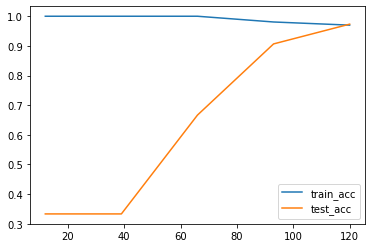

In [7]:
#将学习曲线给出的数据可视化
import matplotlib.pyplot as plt
plt.plot(train_size,train_acc.mean(axis=1),label='train_acc')
plt.plot(train_size,test_acc.mean(axis=1),label='test_acc')
plt.legend()
plt.show()

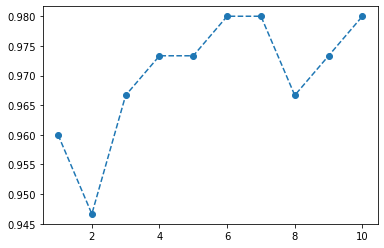

In [13]:
#常规的选择超参数的方法
acc = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i) 
    acc.append(cross_val_score(knn,iris_x,iris_y,cv=5).mean())

plt.plot(range(1,11),acc,'o--')
plt.show()

In [14]:
#参数验证曲线
from sklearn.model_selection import validation_curve

knn = KNeighborsClassifier()
train_acc,test_acc = validation_curve(knn, iris_x, iris_y, param_name='n_neighbors', 
                                      param_range=range(1,11),cv=5)
print(train_acc)
print(test_acc)


[[1.         1.         1.         1.         1.        ]
 [0.975      0.98333333 0.975      0.98333333 0.975     ]
 [0.95833333 0.95833333 0.96666667 0.96666667 0.95      ]
 [0.95833333 0.95833333 0.95833333 0.975      0.96666667]
 [0.96666667 0.96666667 0.975      0.975      0.96666667]
 [0.96666667 0.975      0.975      0.98333333 0.96666667]
 [0.96666667 0.96666667 0.975      0.98333333 0.975     ]
 [0.975      0.98333333 0.975      0.99166667 0.975     ]
 [0.975      0.98333333 0.975      0.98333333 0.975     ]
 [0.975      0.975      0.975      0.98333333 0.95833333]]
[[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
 [0.96666667 0.93333333 0.93333333 0.9        1.        ]
 [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]
 [0.96666667 0.96666667 0.96666667 0.96666667 1.        ]
 [0.96666667 1.         0.93333333 0.96666667 1.        ]
 [0.96666667 1.         0.96666667 0.96666667 1.        ]
 [0.96666667 1.         0.96666667 0.96666667 1.        ]
 [0.96666667 

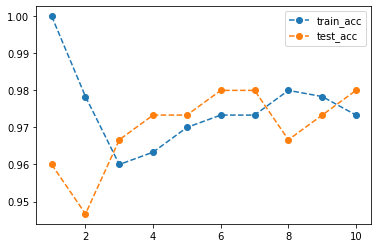

In [17]:
#参数验证曲线的可视化
plt.plot(range(1,11),train_acc.mean(axis=1),'o--',label='train_acc')
plt.plot(range(1,11),test_acc.mean(axis=1),'o--',label='test_acc')
plt.legend()
plt.show()